In [1]:
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
# img = Image.open('saved name in pc')

In [3]:
df = pd.read_csv('iris.csv')
df.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.columns

Index(['Unnamed: 0', 'sepal_length', 'sepal_width', 'petal_length',
       'petal_width', 'species'],
      dtype='object')

In [5]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df['species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

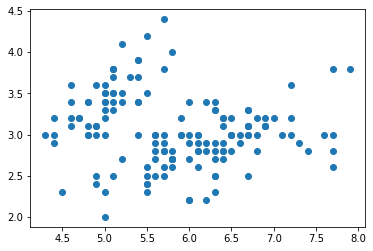

In [8]:
plt.scatter(df['sepal_length'], df['sepal_width'])

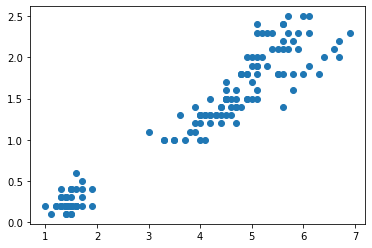

In [9]:
plt.scatter(df['petal_length'], df['petal_width'])

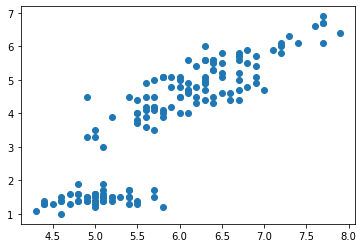

In [10]:
plt.scatter(df['sepal_length'], df['petal_length'])

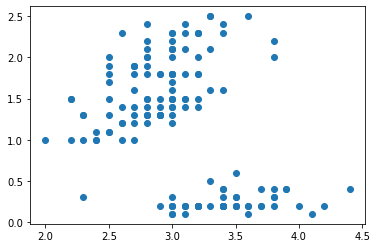

In [11]:
plt.scatter(df['sepal_width'], df['petal_width'])

In [12]:
import seaborn as sns

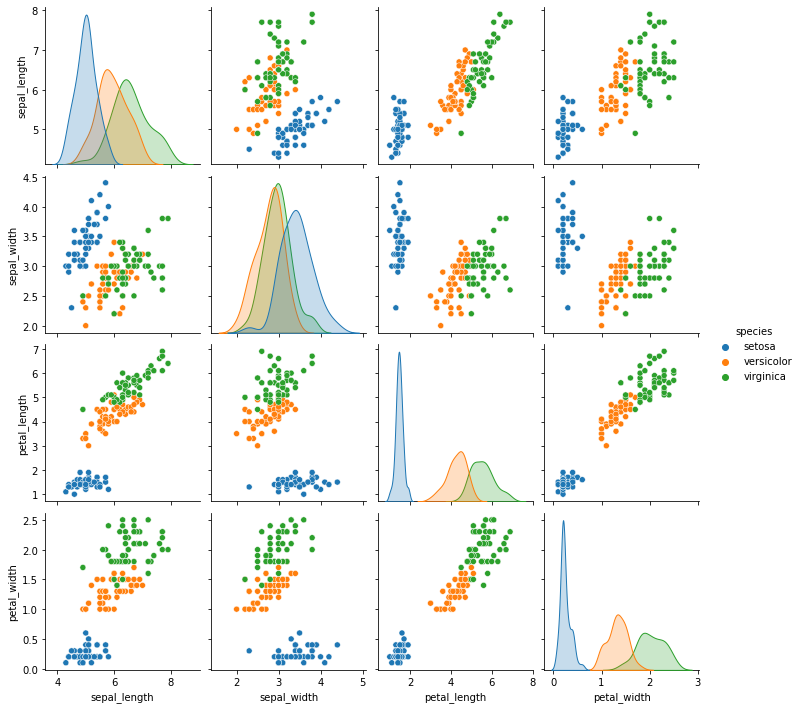

In [13]:
sns.pairplot(df, hue='species')

In [14]:
df1 = df.loc[:99]
df1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


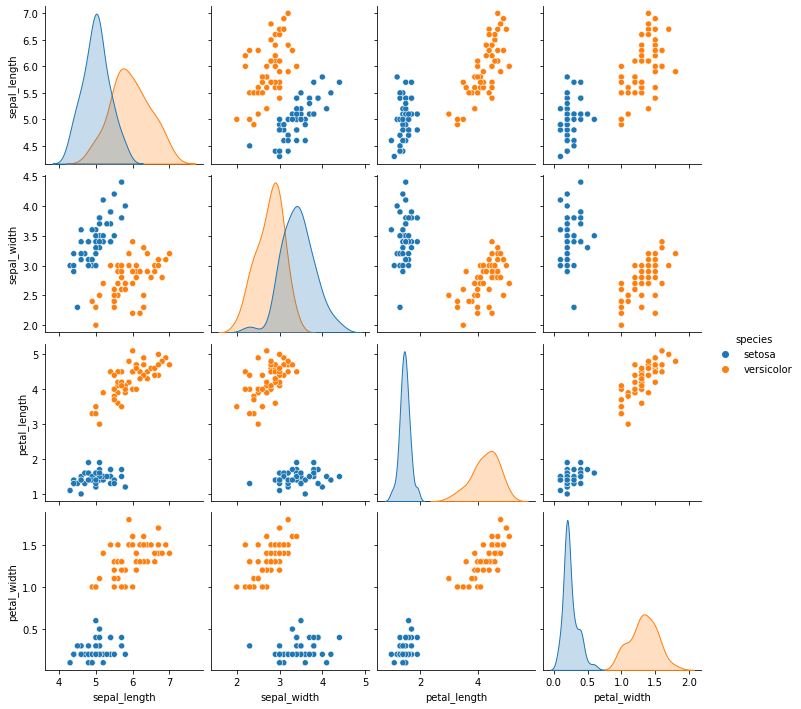

In [15]:
sns.pairplot(df1, hue='species')

In [16]:
df2 = df[(df['species']=='setosa')|(df['species']=='versicolor')]

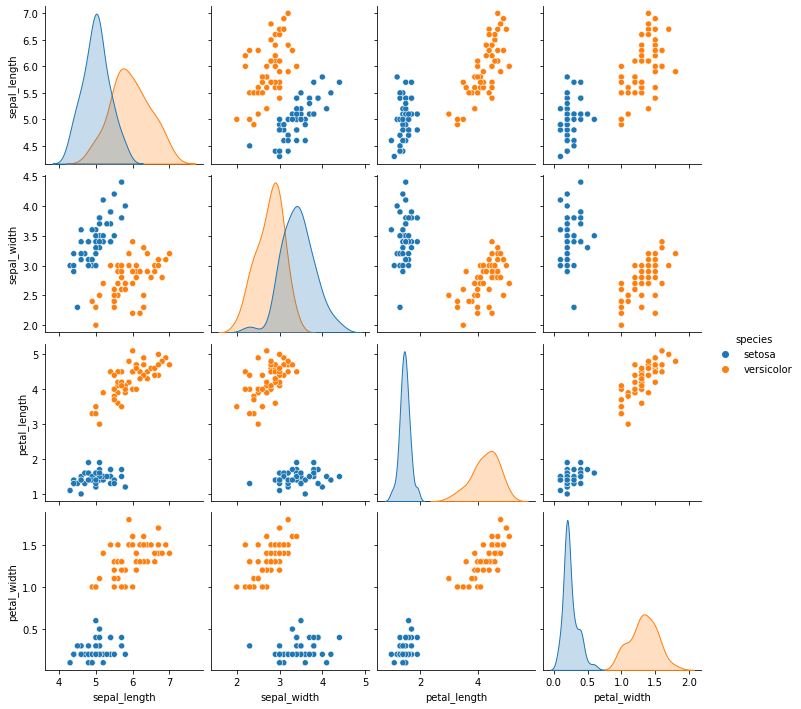

In [17]:
sns.pairplot(df2, hue='species')

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(df2.drop('species',axis=1), df2['species'], test_size=0.25, random_state=101)

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  100 non-null    float64
 1   sepal_width   100 non-null    float64
 2   petal_length  100 non-null    float64
 3   petal_width   100 non-null    float64
 4   species       100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.7+ KB


In [22]:
model = LogisticRegression().fit(xtrain,ytrain)
round(model.score(xtest,ytest)*100, 2)

100.0

In [23]:
df3 = df[(df['species']=='versicolor')|(df['species']=='virginica')]
xtrain3, xtest3, ytrain3, ytest3 = train_test_split(df3.drop('species',axis=1), df3['species'], test_size=0.25, random_state=101)
model3 = LogisticRegression().fit(xtrain3,ytrain3)
round(model3.score(xtest3,ytest3)*100, 2)                                 

100.0

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
ypred3 = model3.predict(xtest3)

In [26]:
print(confusion_matrix(ytest3, ypred3))

[[15  0]
 [ 0 10]]


In [28]:
print(classification_report(ytest3,ypred3))

              precision    recall  f1-score   support

  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

